In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
import scipy
%matplotlib inline

activity = pd.read_csv('./datasets/UCI PAMAP2/activity_3_rec.csv', 
                    sep=',')
display(activity.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1942872 entries, 0 to 1942871
Data columns (total 44 columns):
subject                    int64
timestamp                  float64
activityID                 int64
motion                     object
heart_rate                 float64
temp_hand                  float64
acceleration_16_x_hand     float64
acceleration_16_y_hand     float64
acceleration_16_z_hand     float64
acceleration_6_x_hand      float64
acceleration_6_y_hand      float64
acceleration_6_z_hand      float64
gyroscope_x_hand           float64
gyroscope_y_hand           float64
gyroscope_z_hand           float64
magnetometer_x_hand        float64
magnetometer_y_hand        float64
magnetometer_z_hand        float64
temp_chest                 float64
acceleration_16_x_chest    float64
acceleration_16_y_chest    float64
acceleration_16_z_chest    float64
acceleration_6_x_chest     float64
acceleration_6_y_chest     float64
acceleration_6_z_chest     float64
gyroscope_x_chest

None

In [3]:
display(len(activity))

1942872

In [4]:
to_drop = ['subject', 'timestamp', 'heart_rate']
activity.drop(axis=1, columns=to_drop, inplace=True)

display(activity.head())

,activityID,motion,temp_hand,acceleration_16_x_hand,acceleration_16_y_hand,acceleration_16_z_hand,acceleration_6_x_hand,acceleration_6_y_hand,acceleration_6_z_hand,gyroscope_x_hand,...,acceleration_16_z_ankle,acceleration_6_x_ankle,acceleration_6_y_ankle,acceleration_6_z_ankle,gyroscope_x_ankle,gyroscope_y_ankle,gyroscope_z_ankle,magnetometer_x_ankle,magnetometer_y_ankle,magnetometer_z_ankle
0,1,n,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,...,0.095156,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696
1,1,n,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,...,-0.020804,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656
2,1,n,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,...,-0.059173,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119
3,1,n,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,...,0.094385,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799
4,1,n,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,...,0.095775,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847


In [5]:
display(activity.isnull().sum())

activityID                     0
motion                         0
temp_hand                  11124
acceleration_16_x_hand     11124
acceleration_16_y_hand     11124
acceleration_16_z_hand     11124
acceleration_6_x_hand      11124
acceleration_6_y_hand      11124
acceleration_6_z_hand      11124
gyroscope_x_hand           11124
gyroscope_y_hand           11124
gyroscope_z_hand           11124
magnetometer_x_hand        11124
magnetometer_y_hand        11124
magnetometer_z_hand        11124
temp_chest                  2420
acceleration_16_x_chest     2420
acceleration_16_y_chest     2420
acceleration_16_z_chest     2420
acceleration_6_x_chest      2420
acceleration_6_y_chest      2420
acceleration_6_z_chest      2420
gyroscope_x_chest           2420
gyroscope_y_chest           2420
gyroscope_z_chest           2420
magnetometer_x_chest        2420
magnetometer_y_chest        2420
magnetometer_z_chest        2420
temp_ankle                  8507
acceleration_16_x_ankle     8507
accelerati

In [6]:
class_label = ['activityID', 'motion']
predictors = [a for a in activity.columns.values if a not in class_label]

for p in predictors:
    activity[p].fillna(activity[p].mean(), inplace=True)

display(predictors)
for p in predictors:
    activity[p] = (activity[p]-activity[p].min()) / (activity[p].max() - activity[p].min())
    activity[p].astype('float32')
    
display(activity.isnull().sum())

['temp_hand',
 'acceleration_16_x_hand',
 'acceleration_16_y_hand',
 'acceleration_16_z_hand',
 'acceleration_6_x_hand',
 'acceleration_6_y_hand',
 'acceleration_6_z_hand',
 'gyroscope_x_hand',
 'gyroscope_y_hand',
 'gyroscope_z_hand',
 'magnetometer_x_hand',
 'magnetometer_y_hand',
 'magnetometer_z_hand',
 'temp_chest',
 'acceleration_16_x_chest',
 'acceleration_16_y_chest',
 'acceleration_16_z_chest',
 'acceleration_6_x_chest',
 'acceleration_6_y_chest',
 'acceleration_6_z_chest',
 'gyroscope_x_chest',
 'gyroscope_y_chest',
 'gyroscope_z_chest',
 'magnetometer_x_chest',
 'magnetometer_y_chest',
 'magnetometer_z_chest',
 'temp_ankle',
 'acceleration_16_x_ankle',
 'acceleration_16_y_ankle',
 'acceleration_16_z_ankle',
 'acceleration_6_x_ankle',
 'acceleration_6_y_ankle',
 'acceleration_6_z_ankle',
 'gyroscope_x_ankle',
 'gyroscope_y_ankle',
 'gyroscope_z_ankle',
 'magnetometer_x_ankle',
 'magnetometer_y_ankle',
 'magnetometer_z_ankle']

activityID                 0
motion                     0
temp_hand                  0
acceleration_16_x_hand     0
acceleration_16_y_hand     0
acceleration_16_z_hand     0
acceleration_6_x_hand      0
acceleration_6_y_hand      0
acceleration_6_z_hand      0
gyroscope_x_hand           0
gyroscope_y_hand           0
gyroscope_z_hand           0
magnetometer_x_hand        0
magnetometer_y_hand        0
magnetometer_z_hand        0
temp_chest                 0
acceleration_16_x_chest    0
acceleration_16_y_chest    0
acceleration_16_z_chest    0
acceleration_6_x_chest     0
acceleration_6_y_chest     0
acceleration_6_z_chest     0
gyroscope_x_chest          0
gyroscope_y_chest          0
gyroscope_z_chest          0
magnetometer_x_chest       0
magnetometer_y_chest       0
magnetometer_z_chest       0
temp_ankle                 0
acceleration_16_x_ankle    0
acceleration_16_y_ankle    0
acceleration_16_z_ankle    0
acceleration_6_x_ankle     0
acceleration_6_y_ankle     0
acceleration_6

In [7]:
X = np.array(activity.drop(axis=1, columns=class_label))
y = np.array(activity['motion'])
y = np.array(list(map(lambda x: 1 if x == 'y' else 0, y)))

In [8]:
display(sum(y))

1136540

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from tqdm import tqdm

def dist(x,y):
    return np.linalg.norm(x-y)
    #return scipy.spatial.distance.correlation(x,y)

def poprow(arr,i):
    pop = arr[i]
    new_array = np.vstack((arr[:i],arr[i+1:]))
    return new_array,pop

def cluster(X, p, k, dist_to_xr):
    #c = [p]
    #D = np.column_stack((X,[dist(v[:-1],p[:-1]) for v in X]))
    #D = D[D[:,-1].argsort()]
    #D = np.delete(D, -1, 1)
    #c.extend(D[:k-1])
    #D = D[k-1:]

    #xc = np.array([p[:-1] for p in c], copy=False, ndmin=2)
    #yc = np.array([p[-1] for p in c], copy=False)
    #cl = (xc, yc)
    #return D, cl

    c = [p]
    if dist_to_xr == None:
        distances = [dist(v[:-1],p[:-1]) for v in X]
    else:
        distances = dist_to_xr
    
    X = X[np.argpartition(distances, k-1)]
    c.extend(X[:k-1])
    X = X[k-1:]
    
    xc = np.array([p[:-1] for p in c], copy=False, ndmin=2)
    yc = np.array([p[-1] for p in c], copy=False)
    cl = (xc, yc)
    
    return X, cl

def mdav(X, y, k):
    D = np.column_stack((X,y))
    clusters = []
    
    # Test feature. progress bar
    pbar = tqdm(total=len(D))
    
    while len(D) >= 3*k:
        # Centroid
        xm = np.mean(D, axis=0)
        # Furthest from centroid
        xri = np.argmax([dist(v[:-1],xm[:-1]) for v in D])
        D, xr = poprow(D, xri)
        # Furthest from furthest from centroid
        dist_to_xr = [dist(v[:-1],xr[:-1]) for v in D]
        xsi = np.argmax(dist_to_xr)
        dist_to_xr = dist_to_xr[:xsi]+dist_to_xr[xsi+1:]
        D, xs = poprow(D, xsi) 

        #cluster of xr
        #distance list to xr is already computed to find xs, 
        #patch to remove a factor of n
        D, c = cluster(D, xr, k, dist_to_xr)
        clusters.append(c)
        
        # Test feature. progress bar
        pbar.update(k)
        
        #cluster of xs
        D, c = cluster(D, xs, k, None)
        clusters.append(c)
       
        # Test feature. progress bar
        pbar.update(k)

                
    if len(D) >= 2*k and len(D) < 3*k:
        # Centroid
        xm = np.mean(D, axis=0)
        # Furthest from centroid
        xri = np.argmax([dist(v[:-1],xm[:-1]) for v in D])
        D, xr = poprow(D, xri)
        #cluster of xr
        D, c = cluster(D, xr, k, None)
        clusters.append(c)
        
        # Test feature. progress bar
        pbar.update(k)
        
        # rest of points
        xc = np.array([p[:-1] for p in D[:]], copy=False, ndmin=2)
        yc = np.array([p[-1] for p in D[:]], copy=False)
        cl = (xc, yc)
        clusters.append(cl)    
        
        # Test feature. progress bar
        pbar.update(len(xc))
        
    else:
        # rest of points
        xc = np.array([p[:-1] for p in D[:]], copy=False, ndmin=2)
        yc = np.array([p[-1] for p in D[:]], copy=False)
        cl = (xc, yc)
        clusters.append(cl)
        
        # Test feature. progress bar
        pbar.update(len(xc))
    
    centroids = np.array([np.mean(c[0],axis=0) for c in clusters], copy=False)
    
    # Test feature. progress bar
    pbar.close()
    
    return clusters, centroids

from sklearn import tree
def gen_explanations(clustering, max_depth=-1):
    explanations = []
    for cluster in clustering:
        # Testing with max depth
        if max_depth < 1:
            exp = tree.DecisionTreeClassifier()
        else:
            exp = tree.DecisionTreeClassifier(max_depth=max_depth)
        exp.fit(cluster[0],cluster[1])
        explanations.append(exp) 
    return explanations

def pre_explanations(explanations, centroids, X):
    predictions = []
    for sample in X:
        #select the closest classifier
        exp = explanations[np.argmin([dist(sample,c) for c in centroids])]
        exp_pred = exp.predict([sample])
        predictions.append(int(exp_pred[0]))
    return predictions

def pre_explanations_ext(explanations, centroids, X, T, n):
    predictions_first = []
    predictions_guided = []
    ret_exp = []
    ret_cen = []
    for sample, truth in zip(X,T):
        #select the 3 closest classifiers
        mins = np.array([dist(sample,c) for c in centroids]).argsort()[:n]
        for m in mins:
            exp = explanations[m]
            exp_pred = exp.predict([sample])
            if(exp_pred[0] == truth):
                break
        predictions_first.append(int(explanations[mins[0]].predict([sample])[0]))
        predictions_guided.append(exp_pred[0])
        ret_exp.append(exp)
        ret_cen.append(centroids[m])
    return predictions_first, predictions_guided, ret_exp, ret_cen

In [12]:
import time
exec_times = []

# Generate clusters for different representativities
representativity = [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
#representativity = [0.05]
K = [int(len(X_train)*r) for r in representativity]
clusterings = []
centroids_of_clusterings = []
for k in K:
    start = time.time()

    clustering, centroids = mdav(X_train, y_train, k)
    clusterings.append(clustering)
    centroids_of_clusterings.append(centroids)  
    
    end = time.time()
    exec_times.append(end-start)
    display(f'Time for k={k}: {end-start} seconds.') 

100%|█████████████████████████████████████████████████████████████████████| 1301724/1301724 [2:50:46<00:00, 127.04it/s]


'Time for k=1301: 10246.871928453445 seconds.'

100%|███████████████████████████████████████████████████████████████████████| 1301724/1301724 [31:34<00:00, 687.01it/s]


'Time for k=6508: 1895.0742099285126 seconds.'

100%|██████████████████████████████████████████████████████████████████████| 1301724/1301724 [15:59<00:00, 1357.18it/s]


'Time for k=13017: 959.3634784221649 seconds.'

100%|█████████████████████████████████████████████████████████████████████| 1301724/1301724 [03:22<00:00, 20928.56it/s]


'Time for k=65086: 202.54914212226868 seconds.'

100%|█████████████████████████████████████████████████████████████████████| 1301724/1301724 [01:47<00:00, 21349.97it/s]


'Time for k=130172: 107.76151585578918 seconds.'

100%|█████████████████████████████████████████████████████████████████████| 1301724/1301724 [01:10<00:00, 19536.84it/s]


'Time for k=195258: 71.08472013473511 seconds.'

100%|█████████████████████████████████████████████████████████████████████| 1301724/1301724 [00:57<00:00, 24261.16it/s]


'Time for k=260344: 57.874035358428955 seconds.'

100%|█████████████████████████████████████████████████████████████████████| 1301724/1301724 [00:48<00:00, 25111.41it/s]


'Time for k=325431: 49.13618564605713 seconds.'

100%|█████████████████████████████████████████████████████████████████████| 1301724/1301724 [00:35<00:00, 26766.72it/s]


'Time for k=390517: 36.07036733627319 seconds.'

In [13]:
#there were som nans
for i in range(len(clusterings)):
    for j in range(len(clusterings[i])):
        clusterings[i][j] = (np.nan_to_num(clusterings[i][j][0]), clusterings[i][j][1])

In [14]:
from tqdm import tqdm 
shallow = False
clu_explanations = []
for clustering in tqdm(clusterings):
    # Test with shallow trees depht=4
    if shallow:
        explanations = gen_explanations(clustering, 4)
    else:
        explanations = gen_explanations(clustering, -1)
    clu_explanations.append(explanations)

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [12:08<00:00, 112.98s/it]


In [15]:
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)
X_test = np.nan_to_num(X_test)
y_test = np.nan_to_num(y_test)


# Train blackbox model

from sklearn.neural_network import MLPClassifier
blackbox = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
blackbox.fit(X_train, y_train)

Iteration 1, loss = 0.31084960
Iteration 2, loss = 0.14919491
Iteration 3, loss = 0.09337780
Iteration 4, loss = 0.07111013
Iteration 5, loss = 0.06053635
Iteration 6, loss = 0.05382380
Iteration 7, loss = 0.04864873
Iteration 8, loss = 0.04482344
Iteration 9, loss = 0.04150527
Iteration 10, loss = 0.03857450
Iteration 11, loss = 0.03601902
Iteration 12, loss = 0.03371667
Iteration 13, loss = 0.03157243
Iteration 14, loss = 0.02978300
Iteration 15, loss = 0.02828225
Iteration 16, loss = 0.02704164
Iteration 17, loss = 0.02566488
Iteration 18, loss = 0.02452784
Iteration 19, loss = 0.02363187
Iteration 20, loss = 0.02280014
Iteration 21, loss = 0.02194103
Iteration 22, loss = 0.02110946
Iteration 23, loss = 0.02031833
Iteration 24, loss = 0.01956121
Iteration 25, loss = 0.01897488
Iteration 26, loss = 0.01850355
Iteration 27, loss = 0.01785438
Iteration 28, loss = 0.01709117
Iteration 29, loss = 0.01665754
Iteration 30, loss = 0.01601355
Iteration 31, loss = 0.01564496
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=21, shuffle=True, solver='sgd', tol=1e-09,
       validation_fraction=0.1, verbose=10, warm_start=False)

In [16]:
#Train big tree
surrogate = tree.DecisionTreeClassifier()
surrogate.fit(X_train,y_train)
display(surrogate.score(X_test, y_test))
display(surrogate.tree_.node_count)

0.9980612900609531

5333

In [17]:
truth = y_test
blackbox_predictions = blackbox.predict(X_test)
surrogate_predictions = surrogate.predict(X_test)

In [18]:
from tqdm import tqdm

explanation_predictions = []
explanation_ext_predictions = []
for i in tqdm(range(len(clu_explanations))):
    #p = pre_explanations(clu_explanations[i], centroids_of_clusterings[i], X_test)
    p,q,_,_ = pre_explanations_ext(clu_explanations[i], centroids_of_clusterings[i], X_test, blackbox_predictions, 3)
    explanation_predictions.append(p)
    explanation_ext_predictions.append(q)

100%|█████████████████████████████████████████████████████████████████████████████████| 9/9 [2:15:15<00:00, 477.22s/it]


In [19]:
# acc = TP+TN/all
acc_blackbox = np.mean([t==p for t,p in zip(truth, blackbox_predictions)])
acc_surrogate = np.mean([t==p for t,p in zip(truth, surrogate_predictions)])
acc_explanations = []
for i in range(len(explanation_predictions)):
    acc_explanations.append(np.mean([t==p for t,p in zip(truth, explanation_predictions[i])]))
    
acc_explanations_ext = []
for i in range(len(explanation_ext_predictions)):
    acc_explanations_ext.append(np.mean([t==p for t,p in zip(truth, explanation_ext_predictions[i])]))

acc_cross = []
for i in range(len(explanation_predictions)):
    acc_cross.append(np.mean([t==p for t,p in zip(blackbox_predictions, explanation_predictions[i])]))

acc_cross_ext = []
for i in range(len(explanation_predictions)):
    acc_cross_ext.append(np.mean([t==p for t,p in zip(blackbox_predictions, explanation_ext_predictions[i])]))

display(acc_blackbox)
display(acc_surrogate)
display(acc_explanations)
display(acc_explanations_ext)
display(acc_cross)
display(acc_cross_ext)

0.9996553057952298

0.9980612900609531

[0.9936114594446213,
 0.9891959422785379,
 0.9888262928372232,
 0.9775574438351208,
 0.983861760467162,
 0.9796084523386176,
 0.9685642004654151,
 0.9738110389488854,
 0.9831037451571244]

[0.9992669399265068,
 0.999500895269111,
 0.9989861935153818,
 0.9994088728343534,
 0.999499335566827,
 0.9996521863906618,
 0.9992950145676194,
 0.999664664008934,
 0.9995897982993006]

[0.9934851235596149,
 0.9890633675843955,
 0.9887405092116017,
 0.9774248691409784,
 0.9837354245821558,
 0.979463400026203,
 0.9684565810078172,
 0.9736535090181986,
 0.9829586928447098]

[0.9993433653384242,
 0.9997176938865909,
 0.9991749174917491,
 0.9995726415741764,
 0.999606955024425,
 0.9997816416802361,
 0.9994962161622589,
 0.9997909998939403,
 0.9997941192985083]

In [20]:
min_nodes = []
max_nodes = []
mean_nodes = []
median_nodes = []
n_counts = []
for explanations in clu_explanations:
    node_counts = [exp.tree_.node_count for exp in explanations]
    n_counts.append(node_counts)
    min_nodes.append(np.min(node_counts))
    max_nodes.append(np.max(node_counts))
    mean_nodes.append(np.mean(node_counts))
    median_nodes.append(np.median(node_counts))

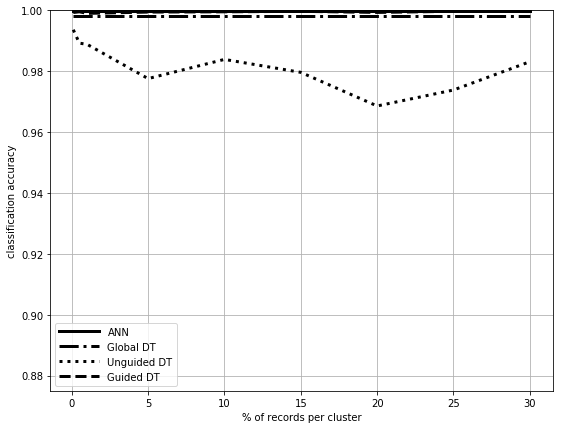

In [21]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

representativity = [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
representativity = list([r*100 for r in representativity])
representativity = representativity

xnew = np.linspace(min(representativity),max(representativity),300)
spl = make_interp_spline(representativity, acc_explanations, k=3) #BSpline object
ynew = spl(xnew)

spl = make_interp_spline(representativity, acc_explanations_ext, k=3) #BSpline object
ynew4 = spl(xnew)

acc_blackbox_const = [acc_blackbox]*len(representativity)
spl = make_interp_spline(representativity, acc_blackbox_const, k=3) #BSpline object
ynew2 = spl(xnew)

big_tree = [acc_surrogate]*len(representativity)
spl = make_interp_spline(representativity, big_tree, k=3) #BSpline object
ynew6 = spl(xnew)

spl = make_interp_spline(representativity, acc_cross, k=3) #BSpline object
ynew3 = spl(xnew)

spl = make_interp_spline(representativity, acc_cross_ext, k=3) #BSpline object
ynew5 = spl(xnew)

spl = make_interp_spline(representativity, exec_times, k=3)
ynew7 = spl(xnew)

plt.figure(figsize=(9,7))
#plt.plot(xnew,ynew2,linestyle='-',linewidth=3,color='k',label='ANN')
#plt.plot(xnew,ynew6,linestyle='-.',linewidth=3,color='k',label='Global DT')
#plt.plot(xnew,ynew,linestyle=':',linewidth=3,color='k',label='Unguided DT')
#plt.plot(xnew,ynew4,linestyle='--',linewidth=3,color='k',label='Guided DT')

plt.plot(representativity,acc_blackbox_const,linestyle='-',linewidth=3,color='k',label='ANN')
plt.plot(representativity,big_tree,linestyle='-.',linewidth=3,color='k',label='Global DT')
plt.plot(representativity,acc_explanations,linestyle=':',linewidth=3,color='k',label='Unguided DT')
plt.plot(representativity,acc_explanations_ext,linestyle='--',linewidth=3,color='k',label='Guided DT')

plt.legend(handlelength=4)
plt.ylim(0.875,1)
plt.xlabel('% of records per cluster')
plt.ylabel('classification accuracy')
plt.grid()
plt.show()
plt.close()

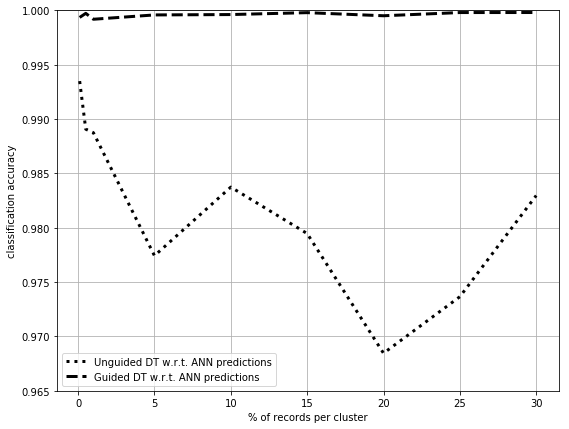

In [23]:
plt.figure(figsize=(9,7))
#plt.plot(xnew,ynew3,linestyle='-',linewidth=3,color='k',label='Unguided DT w.r.t. ANN predictions')
#plt.plot(xnew,ynew5,linestyle=':',linewidth=3,color='k',label='Guided DT w.r.t. ANN predictions')

plt.plot(representativity,acc_cross,linestyle=':',linewidth=3,color='k',label='Unguided DT w.r.t. ANN predictions')
plt.plot(representativity,acc_cross_ext,linestyle='--',linewidth=3,color='k',label='Guided DT w.r.t. ANN predictions')

plt.legend()
plt.ylim(0.965,1)
plt.xlabel('% of records per cluster')
plt.ylabel('classification accuracy')
plt.grid()
plt.show()
plt.close()

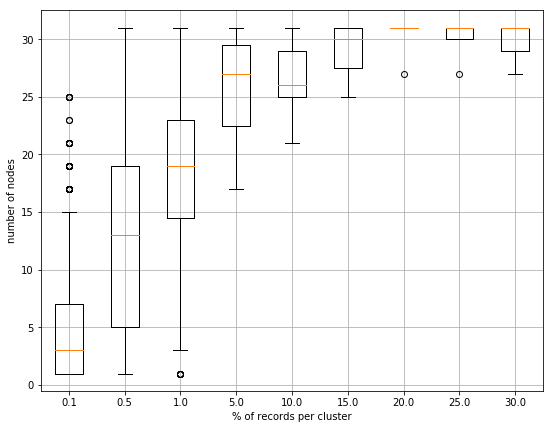

In [42]:
plt.figure(figsize=(9,7))
plt.boxplot(n_counts[:9])
locs, _ = plt.xticks()
plt.xticks(locs, representativity)
#plt.yscale('log')
plt.xlabel('% of records per cluster')
plt.ylabel('number of nodes')
#plt.ylabel('number of nodes (log scale)')
plt.grid()
plt.show()
plt.close()

No handles with labels found to put in legend.


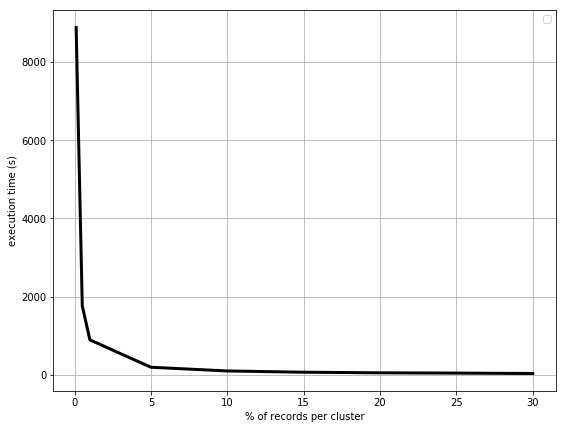

In [38]:
plt.figure(figsize=(9,7))
plt.plot(representativity,exec_times,linestyle='-',linewidth=3,color='k')

plt.legend()
plt.xlabel('% of records per cluster')
plt.ylabel('execution time (s)')
plt.grid()
plt.show()
plt.close()